# [Kaggle] Space Titanic

## 1.개요

https://www.kaggle.com/competitions/spaceship-titanic  
'Spaceship-titanic'은 캐글 연습용으로 제공 되는 컴피티션입니다. 주어진 데이터들을 이용해 탑승객이 다른 차원으로 이동 되었는 지 여부를 확인하는 **이진분류 문제**입니다.

---

## 2. 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('/Users/gyol/Documents/Kaggle/spaceship-titanic/train.csv')
test=pd.read_csv('/Users/gyol/Documents/Kaggle/spaceship-titanic/test.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### 데이터 용어 정리
* **PassengerId** - 각 승객마다 고유한 ID가 있습니다. 이 각각의 ID는 승객이 함께 여행하는 그룹을 나타내는 "gggg"와 해당 그룹 내에서의 승객 번호를 나타내는 "pp"로 구성됩니다. 그룹 내의 사람들은 주로 가족 구성원이지만 항상 그렇지는 않습니다.
* **HomePlanet** - 탑승객이 출발한 행성입니다. 출발한 행성은 일반적으로 그들의 거주 행성입니다.
* **CryoSleep** - 이 항목은 승객이 항해 기간 동안 움직임이 없는 상태로 여정을 하고싶은지 여부를 나타냅니다. CryoSleep에 있는 승객은 자신의 선실에 가두어져 있습니다.  
* **Cabin** - 승객이 머무는 선실 번호입니다. 승객이 머무는 선실 번호는 "deck/num/side" 형식을 취하며, 여기서 "side"는 Port(포트)를 나타내는 "P" 또는 Starboard(스타보드)를 나타내는 "S" 중 하나가 될 수 있습니다.  
* **Destination** - 탑승객이 가는 목적지 행성입니다.  
* **Age** - 탑승객의 나이입니다.  
* **VIP** - 탑승객이 일정 금액을 더 내서 얻은 VIP 여부입니다.  
* **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - 타이타닉 호에서 제공하는 각종 편의 시설에 탑승객이 지불한 비용입니다.  
* **Name** - 탑승객의 성과 이름입니다.  
* **Transported** - 탑승객이 다른 차원으로 이동했는지 여부입니다. 이 열이 저희가 얻고자 하는 **Target** 입니다.

---

## 3. 데이터 분석

In [4]:
train.shape

(8693, 14)

In [5]:
test.shape

(4277, 13)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


채워야 할 결측지가 모든 열에서 존재한다는 것을 확인 할 수 있습니다. **데이터 타입**에 따라 해석하겠습니다.

In [7]:
print('전체 인원 수는 {}명이다. 그 중 다른 차원으로 이동 된 인원은 {}명이고, 이동률은 {}%이다.'
      .format(len(train['Transported']),
              (train['Transported'] == True).sum(),
              round(((train['Transported'] == True).sum())/(len(train['Transported']))*100,2)
             )
     )

전체 인원 수는 8693명이다. 그 중 다른 차원으로 이동 된 인원은 4378명이고, 이동률은 50.36%이다.


### 3-1. 수치형 데이터

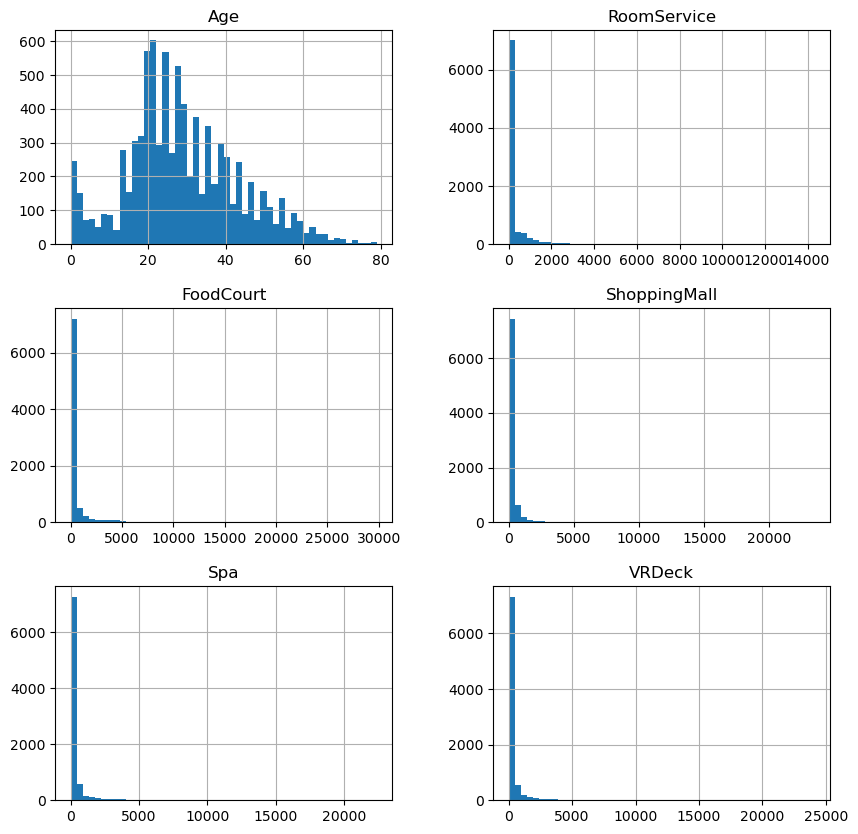

In [8]:
%matplotlib inline
train.hist(bins=50,figsize=(10,10))
plt.show()

Age를 제외한 나머지 열은 지불한 비용의 분포를 의미합니다. 이 때 극단적으로 비용을 지불한 소수의 탑승객이 존재하고, 나머지는 대부분 0에 가까운 비용을 냈다는 것을 확인 할 수 있습니다.

### 3-2. 오브젝트형 데이터

오브젝트형 데이터 중에 PassenID와 Cabin처럼 한 데이터 안에 여러 정보를 내포하고 있는 데이터부터 우선 나누겠습니다.

In [9]:
train_sliced=train.copy()
train_sliced[['PassengerId_group','PassengerId_member']]=train_sliced['PassengerId'].str.split('_',expand=True)
train_sliced[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']]=train_sliced['Cabin'].str.split('/',expand=True)

각 열의 데이터는 어떤 값이 존재하며, 어떻게 분포 되어 있는지 표를 통해 확인 해보겠습니다.

In [10]:
train_sliced.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerId_group,PassengerId_member,Cabin_Deck,Cabin_Num,Cabin_Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,S


In [11]:
def tp_rate(feature): #tp_rate는 원하는 열의 각 데이터의 이동한 인원, 안 한 인원, 이동 비율을 나타내는 함수입니다.
    transported=train_sliced[train_sliced['Transported']==1][feature].value_counts(dropna=False)
    not_transported=train_sliced[train_sliced['Transported']==0][feature].value_counts(dropna=False)
    transported_rate = round((transported / (transported + not_transported)) * 100,1)
    
    result_df = pd.DataFrame({
        '이동 비율(%)': transported_rate,
        '이동 됨': transported,
        '이동 안됨': not_transported,
        '인원 합계': train_sliced[feature].value_counts(dropna=False)
    })
    return result_df.fillna(0)

In [12]:
tp_rate('PassengerId_group')

,이동 비율(%),이동 됨,이동 안됨,인원 합계
0001,0.0,0.0,1.0,1
0002,0.0,1.0,0.0,1
0003,0.0,0.0,2.0,2
0004,0.0,1.0,0.0,1
0005,0.0,1.0,0.0,1
...,...,...,...,...
9275,66.7,2.0,1.0,3
9276,0.0,0.0,1.0,1
9278,0.0,0.0,1.0,1
9279,0.0,1.0,0.0,1


PassengerId_group의 데이터값은 매우 많다는 것을 확인 할 수 있습니다.

In [13]:
tp_rate('PassengerId_member')

,이동 비율(%),이동 됨,이동 안됨,인원 합계
01,47.6,2959,3258,6217
02,55.9,789,623,1412
03,61.8,353,218,571
04,59.3,137,94,231
05,54.7,70,58,128
06,54.7,41,34,75
07,50.0,23,23,46
08,46.2,6,7,13


엄청난 차이를 낸 것은 아니지만, 같은 그룹 내에서도 3,4번 숫자를 가진 사람의 이동 비율이 높다는 것을 확인 할 수 있었습니다. 그리고 1,8번을 가진 사람은 이동 비율이 적다는 것을 확인 할 수 있었습니다.

In [14]:
tp_rate('HomePlanet')

,이동 비율(%),이동 됨,이동 안됨,인원 합계
NaN,51.2,103,98,201
Earth,42.4,1951,2651,4602
Europa,65.9,1404,727,2131
Mars,52.3,920,839,1759


1. 'Earth'에서 출발한 인원이 가장 적게 이동 되었고, 'Europa'에서 가장 많은 인원이 이동 된 것을 확인 할 수 있습니다.
2. HomePlanet의 결측치는 'Mars'와 분포가 매우 유사한 것을 확인 할 수 있습니다. 따라서 HomePlanet의 결측치는 'Mars'로 대체하는 것이 합리적이라 판단했습니다.

In [15]:
tp_rate('CryoSleep')

,이동 비율(%),이동 됨,이동 안됨,인원 합계
False,32.9,1789,3650,5439
True,81.8,2483,554,3037
NaN,48.8,106,111,217


1. CryoSleep을 한 인원은 다수가 이동 되었음을 확인 할 수 있습니다. 안 한 인원은 이동 하지 않았을 가능성이 비교적 큽니다.
2. CryoSleep에서는 결측치와 비슷한 분포를 찾을 수 없습니다. 확률적으로 고르게 분포하기 위해 'ffill', 즉 앞의 데이터로 채우겠습니다.

In [16]:
tp_rate('Destination')

,이동 비율(%),이동 됨,이동 안됨,인원 합계
TRAPPIST-1e,47.1,2787,3128,5915
55 Cancri e,61.0,1098,702,1800
PSO J318.5-22,50.4,401,395,796
NaN,50.5,92,90,182


1. 도착예정지가 '55 Cancri e'인 탑승객은 비교적 많이 이동 되었고, 'TRAPPIST-1e'는 비교적 적은 것을 확인 할 수 있습니다.
2. Destination의 결측치는 'PSO J318.5-22'의 분포와 매우 유사합니다. 따라서 Destination의 결측치는 'PSO J318.5-22'로 대체하겠습니다.

In [17]:
tp_rate('Cabin_Deck')

,이동 비율(%),이동 됨,이동 안됨,인원 합계
NaN,50.3,100,99,199
A,49.6,127,129,256
B,73.4,572,207,779
C,68.0,508,239,747
D,43.3,207,271,478
E,35.7,313,563,876
F,44.0,1229,1565,2794
G,51.6,1321,1238,2559
T,20.0,1,4,5


1. 선실 타입에 따라 이동 비율이 다르다는 것을 확인 할 수 있습니다.
2. Cabin_Deck에서는 결측치와 비슷한 분포를 찾을 수 없습니다. 확률적으로 고르게 분포하기 위해 'ffill', 즉 앞의 데이터로 채우겠습니다.

In [18]:
tp_rate('Cabin_Num')

,이동 비율(%),이동 됨,이동 안됨,인원 합계
NaN,50.3,100.0,99.0,199
0,33.3,6.0,12.0,18
1,66.7,10.0,5.0,15
10,50.0,6.0,6.0,12
100,58.3,7.0,5.0,12
...,...,...,...,...
995,66.7,2.0,1.0,3
996,0.0,1.0,0.0,1
997,0.0,0.0,2.0,2
998,25.0,1.0,3.0,4


PassengerId_group의 데이터값은 매우 많다는 것을 확인 할 수 있습니다.

In [19]:
tp_rate('Cabin_Side')

,이동 비율(%),이동 됨,이동 안됨,인원 합계
NaN,50.3,100,99,199
P,45.1,1898,2308,4206
S,55.5,2380,1908,4288


Cabin_Side에서는 결측치와 비슷한 분포를 찾을 수 없습니다. 확률적으로 고르게 분포하기 위해 'ffill', 즉 앞의 데이터로 채우겠습니다.

In [20]:
tp_rate('VIP')

,이동 비율(%),이동 됨,이동 안됨,인원 합계
False,50.6,4198,4093,8291
NaN,51.2,104,99,203
True,38.2,76,123,199


VIP의 결측치는 'False'의 분포와 유사합니다. 따라서 VIP의 결측치는 'False'로 대체하겠습니다.

---

## 4. 결측치 처리

In [21]:
train_droptp=train.drop('Transported',axis=1,inplace=False)

In [22]:
total_data=pd.concat([train_droptp,test])

In [23]:
total_data.shape

(12970, 13)

Train과 Test에서 결측치를 없애기 위해 우선 두 데이터를 합치는 작업을 했습니다. Test 에는 Transported 열이 없기에 train 에서 해당 열을 삭제 한 뒤 합쳤습니다.

In [24]:
total_data.isnull().sum()

PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
dtype: int64

### 4-1. 수치형 데이터

In [25]:
columns_to_fill = ['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for column in columns_to_fill:
    median_value = total_data[column].median()
    total_data[column].fillna(median_value, inplace=True)

수치형 데이터는 대부분 0 쪽에 몰려 있고, 최대값은 극단적으로 크기 때문에 평균은 쓰지 않았습니다. 대신 중간값으로 결측치를 채웠습니다.

### 4-2. 오브젝트형 데이터

In [26]:
total_data['HomePlanet'].fillna('Mars',inplace=True)
total_data['CryoSleep'].fillna(method='ffill',inplace=True)
total_data['Destination'].fillna('PSO J318.5-22',inplace=True)
total_data['VIP'].fillna(method='ffill',inplace=True)

PassengerId를 제외한 나머지 범주형 데이터를 가진 행의 Null을 채우겠습니다. 채운 기준은 데이터 분석 과정에서 내린 결론입니다. Cabin 또한 여러 데이터를 포함하기에 나눠보겠습니다.

In [27]:
total_data[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = total_data['Cabin'].str.split('/', expand=True)
total_data.drop('Cabin',axis=1,inplace=True)

In [28]:
total_data['Cabin_Deck'].fillna(method='ffill',inplace=True)
total_data['Cabin_Num'].fillna(method='ffill',inplace=True)
total_data['Cabin_Side'].fillna(method='ffill',inplace=True)

In [29]:
total_data[['PassengerId_group', 'PassengerId_member']] = total_data['PassengerId'].str.split('_', expand=True)

In [30]:
total_data.drop('Name',axis=1,inplace=True)
total_data.drop('PassengerId',axis=1,inplace=True) #머신 러닝에 사용하지 않는 열은 삭제했습니다.

In [31]:
total_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_Num,Cabin_Side,PassengerId_group,PassengerId_member
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,0,P,0001,01
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,0,S,0002,01
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,0,S,0003,01
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,0,S,0003,02
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,1,S,0004,01


## 5. 데이터 맵핑

In [32]:
Cabin_Deck_mapping={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8}
total_data['Cabin_Deck']=total_data['Cabin_Deck'].map(Cabin_Deck_mapping)

Cabin_Side_mapping={'P':1,'S':2}
total_data['Cabin_Side']=total_data['Cabin_Side'].map(Cabin_Side_mapping)

HomePlanet_mapping={'Europa':1,'Earth':2,'Mars':3}
total_data['HomePlanet']=total_data['HomePlanet'].map(HomePlanet_mapping)

Destination_mapping={'TRAPPIST-1e':1,'55 Cancri e':2,'PSO J318.5-22':3}
total_data['Destination']=total_data['Destination'].map(Destination_mapping)

In [33]:
TF_mapping = {'False': 0, 'True': 1}
total_data['CryoSleep'].replace(TF_mapping, inplace=True)
total_data['VIP'].replace(TF_mapping, inplace=True)

In [35]:
total_data['PassengerId_group'] = total_data['PassengerId_group'].astype(int)
total_data['PassengerId_member'] = total_data['PassengerId_member'].astype(int)
total_data['Cabin_Num'] = total_data['Cabin_Num'].astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HomePlanet          12970 non-null  int64  
 1   CryoSleep           12970 non-null  bool   
 2   Destination         12970 non-null  int64  
 3   Age                 12970 non-null  float64
 4   VIP                 12970 non-null  bool   
 5   RoomService         12970 non-null  float64
 6   FoodCourt           12970 non-null  float64
 7   ShoppingMall        12970 non-null  float64
 8   Spa                 12970 non-null  float64
 9   VRDeck              12970 non-null  float64
 10  Cabin_Deck          12970 non-null  int64  
 11  Cabin_Num           12970 non-null  int64  
 12  Cabin_Side          12970 non-null  int64  
 13  PassengerId_group   12970 non-null  int64  
 14  PassengerId_member  12970 non-null  int64  
dtypes: bool(2), float64(6), int64(7)
memory usage: 1.4 MB


In [36]:
X_train=total_data[:len(train)]
X_test=total_data[len(train):]

HomePlanet            0
CryoSleep             0
Destination           0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Cabin_Deck            0
Cabin_Num             0
Cabin_Side            0
PassengerId_group     0
PassengerId_member    0
dtype: int64

---

## 6. 머신러닝

In [37]:
target=train['Transported']

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

머신러닝에서 자주 사용되는 알고리즘 5개를 이용해 점수가 가장 높게 나오는 모델을 사용하겠습니다.

In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10,random_state=0,shuffle=True)

### 모델 평가

In [68]:
clf=KNeighborsClassifier(n_neighbors=26)
score=cross_val_score(clf,X_train,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)

[0.77586207 0.74597701 0.74942529 0.78020713 0.75258918 0.7721519
 0.79286536 0.78711162 0.78481013 0.77100115]


In [69]:
round(np.mean(score)*100,2)

77.12

K-최근접 이웃은 77.12점이 나왔습니다.

In [70]:
clf=DecisionTreeClassifier()
score=cross_val_score(clf,X_train,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)

[0.73103448 0.74022989 0.74252874 0.75143843 0.73647871 0.72266974
 0.73532796 0.75489068 0.75143843 0.72497123]


In [71]:
round(np.mean(score)*100,2)

73.91

결정 트리는 73.91이 나왔습니다.

In [92]:
clf=RandomForestClassifier(n_estimators=26)
score=cross_val_score(clf,X_train,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)

[0.8137931  0.78045977 0.80229885 0.79516686 0.79171461 0.8009206
 0.78826237 0.80667434 0.81472957 0.77790564]


In [93]:
round(np.mean(score)*100,2)

79.72

랜덤 포레스트는 **79.72점**이 나왔습니다.

In [94]:
clf=GaussianNB()
score=cross_val_score(clf,X_train,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)

[0.70229885 0.69655172 0.68735632 0.71806674 0.70080552 0.71116226
 0.72036824 0.73532796 0.72382048 0.69965478]


In [95]:
round(np.mean(score)*100,2)

70.95

가우시안 나이브 베이즈는 70.95점이 나왔습니다.

In [96]:
clf=SVC()
score=cross_val_score(clf,X_train,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)

[0.77011494 0.77241379 0.77701149 0.79056387 0.75143843 0.77790564
 0.78711162 0.7986191  0.7721519  0.78365938]


In [97]:
round(np.mean(score)*100,2)

77.81

서포트 벡터 머신은 77.81점이 나왔습니다.

In [98]:
clf=RandomForestClassifier(n_estimators=26)
clf.fit(X_train, target)
prediction=clf.predict(X_test)

In [99]:
submission=pd.DataFrame({
    "PassengerId":test['PassengerId'],
    'Transported':prediction
    })
submission.to_csv(path_or_buf='/Users/gyol/Documents/Kaggle/spaceship-titanic/submission.csv',index=False)

In [100]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


## 7. 결론

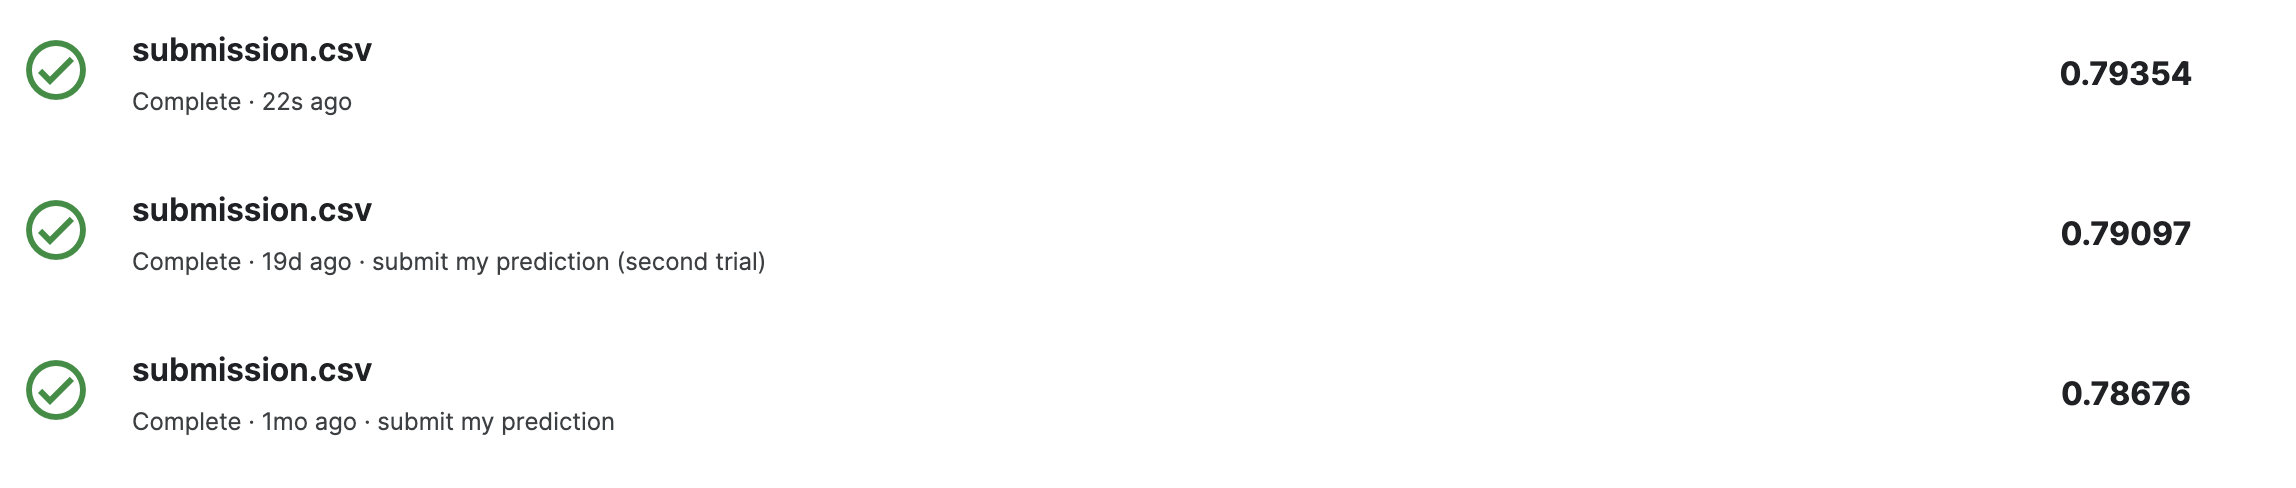

In [105]:
from IPython.display import Image
Image("/Users/gyol/Documents/Kaggle/spaceship-titanic/result.jpg")

Kaggle에 제출했을 때 **0.79354점**을 받았고, 등수는 **총 2076팀 중 974등**으로 마무리 되었습니다. 첫 번째 시도에서는 사용하지 않았던 PassengerId 나 Cabin 열까지 사용을 했으나 점수의 큰 변화는 가질 수 없었습니다. 수치형 데이터의 값을 Median 말고 좀 더 합리적으로 결측치를 채우는 방법을 고안해야 할 것 같습니다. 그리고 수치형 데이터는 범주형에 비해 숫자의 크기가 매우 커서 데이터의 크기를 알맞게 맞추는 방법을 연구해야 할 것 같습니다.